# Web Mining and Applied NLP
## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy
### Student Name: Pranali Baban Dhoable
Github repo: https://github.com/TechPranali/web-scraping<br>
Perform the tasks described in the Markdown cells below. When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.<br>

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (.py), then import and run the appropriate code to answer the question.<br>

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup

!pip list

print('All prereqs installed.')

Package            VersionAll prereqs installed.

------------------ ----------
annotated-types    0.6.0
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
confection         0.1.4
cymem              2.0.8
html5lib           1.1
idna               3.6
Jinja2             3.1.3
joblib             1.4.0
langcodes          3.3.0
MarkupSafe         2.1.5
murmurhash         1.0.10
nltk               3.8.1
numpy              1.26.4
packaging          24.0
pip                23.2.1
preshed            3.0.9
pydantic           2.6.4
pydantic_core      2.16.3
regex              2023.12.25
requests           2.31.0
setuptools         69.2.0
six                1.16.0
smart-open         6.4.0
soupsieve          2.5
spacy              3.7.4
spacy-legacy       3.0.12
spacy-loggers      1.0.5
spacytextblob      4.0.0
srsly              2.4.8
textblo


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Question 1: <br>
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)<br><br>
Question 1: Response & Output

In [4]:
import requests
import pickle

# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

try:
    # Fetch the HTML content
    response = requests.get(url)
    
    # Check if request was successful
    if response.status_code == 200:
        # Dump HTML content to a .pkl file
        with open("article_html.pkl", "wb") as f:
            pickle.dump(response.text, f)
        print("HTML content extracted and dumped to article_html.pkl successfully.")
    else:
        print("Failed to fetch HTML content. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", e)


HTML content extracted and dumped to article_html.pkl successfully.


## Question 2:
2. Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())<br><br>
Question 2 Response & Output:

In [5]:
import pickle
from bs4 import BeautifulSoup

# Load HTML content from the .pkl file
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

# Create BeautifulSoup object
soup = BeautifulSoup(html_content, "html.parser")

# Get text from the HTML content
text = soup.get_text()

# Print the text
print(text)


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

## Question 3:
3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common     tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).<br><br>
Question 3 Response & Output:

In [7]:
import pickle
import spacy
from collections import Counter

# Load HTML content from the .pkl file
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

# Create spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(html_content)

# Remove punctuation, stopwords, and whitespace
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_space]

# Get the 5 most frequent tokens
most_common_tokens = Counter(tokens).most_common(5)

# Print the most common tokens
print("Top 5 most frequent tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens and their frequencies
print("\nAll tokens and their frequencies:")
for token, frequency in Counter(tokens).items():
    print(f"{token}: {frequency}")


Top 5 most frequent tokens:
div: 685
data: 591
laser: 354
headlights: 334
content: 323

All tokens and their frequencies:
doctype: 1
html: 2
article: 134
javascript: 19
js: 137
bundle: 1
script: 24
window: 6
ruffleplayer: 1
ruffle: 1
web: 3
laser: 354
headlights: 334
link: 164
css: 14
banner: 1
qtvmkcij: 1
end: 10
wayback: 2
rewrite: 1
include: 2
meta: 292
site: 8
verification: 4
image: 41
preview: 2
large: 8
device: 3
width: 7
initial: 1
color: 9
title: 7
work: 12
icon: 40
wp: 66
content: 323
themes: 9
lt: 1
ie: 4
jetpack: 5
tags: 3
prefetch: 10
feed: 3
comments: 290
emoji: 1
n: 1
r: 2
o: 2
t: 3
e: 1
document: 1
style: 6
smiley: 1
display: 3
inline: 3
important: 12
border: 1
box: 2
shadow: 1
height: 4
margin: 1
vertical: 1
align: 3
background: 2
padding: 1
includes: 3
dist: 1
block: 3
library: 2
mu: 2
plugins: 2
text: 9
justify: 1
ajax: 1
request: 2
extra: 4
var: 11
safecommentsajax: 1
json: 4
laserheadlight: 5
think: 15
onward: 3
march: 133
automotive: 13
technology: 17
usually: 3
th

## Question 4:
4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).<br><br>
Question 4 Response & Output:

In [8]:
import pickle
import spacy
from collections import Counter

# Load HTML content from the .pkl file
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

# Create spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(html_content)

# Remove punctuation, stopwords, and whitespace, and get lemmas
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_space]

# Get the 5 most frequent lemmas
most_common_lemmas = Counter(lemmas).most_common(5)

# Print the most common lemmas
print("Top 5 most frequent lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies
print("\nAll lemmas and their frequencies:")
for lemma, frequency in Counter(lemmas).items():
    print(f"{lemma}: {frequency}")


Top 5 most frequent lemmas:
div: 685
data: 590
laser: 361
headlight: 359
content: 323

All lemmas and their frequencies:
doctype: 1
html: 2
article: 134
javascript: 19
js: 137
bundle: 1
script: 25
window: 9
ruffleplayer: 1
ruffle: 1
web: 3
laser: 361
headlight: 359
link: 166
css: 14
banner: 1
qtvmkcij: 1
end: 10
wayback: 2
rewrite: 1
include: 5
meta: 292
site: 8
verification: 4
image: 41
preview: 2
large: 9
device: 3
width: 7
initial: 1
color: 11
title: 9
headlights: 9
work: 22
icon: 40
wp: 66
content: 323
theme: 9
lt: 1
ie: 4
jetpack: 5
tags: 3
prefetch: 10
feed: 3
comments: 82
comment: 232
emoji: 1
n: 1
r: 2
o: 2
t: 3
e: 1
document: 1
style: 6
smiley: 1
display: 3
inline: 3
important: 12
border: 1
box: 2
shadow: 1
height: 4
margin: 1
vertical: 1
align: 4
background: 2
padding: 1
dist: 1
block: 4
library: 2
mu: 2
plugins: 2
text: 9
justify: 1
ajax: 1
request: 2
extra: 4
var: 11
safecommentsajax: 1
json: 4
laserheadlight: 5
think: 18
onward: 3
march: 133
automotive: 13
technology: 19
u

## Question 5:
5. Define the following methods:
score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.
<br><br>
Question 5 Response & Output:

In [40]:
import re

def score_sentence_by_token(sentence, interesting_tokens):
    tokens = re.findall(r'\b\w+(?:\'\w+)?\b', sentence)
    score = sum(1 for token in tokens if token.lower() in interesting_tokens) / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = re.findall(r'\b\w+(?:\'\w+)?\b', sentence)
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

first_sentence = "When we think about the onward march of automotive technology, headlights aren't usually the first thing that come to mind." # first sentence in the article
interesting_tokens = ["laser", "headlights", "headlight", "technology", "led"] # frequent tokens from question 3
interesting_lemmas = ["laser", "headlight", "beam", "technology", "light"] #frequent lemmas from question 4

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print("Token score:", token_score)
print("Lemma score:", lemma_score)

Token score: 0.1
Lemma score: 0.05


## Question 6:
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
<br><br>
Question 6 Response & Output:

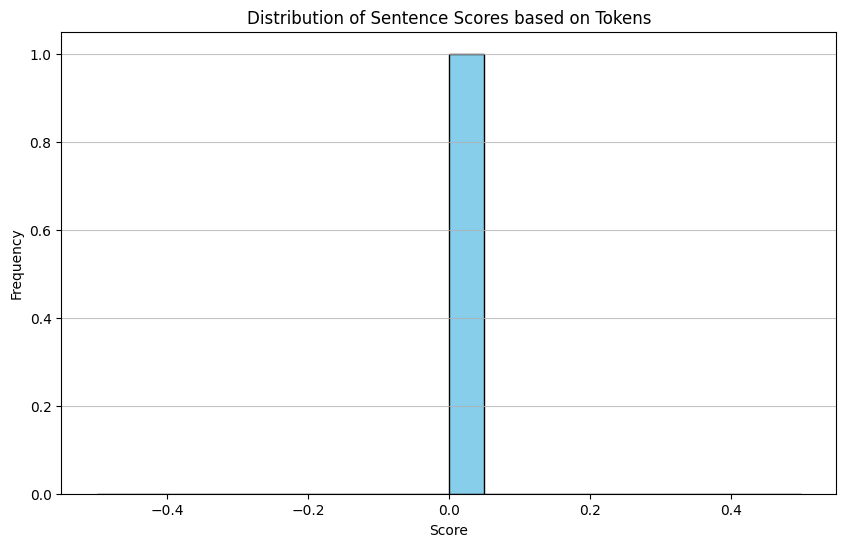

In [42]:
import matplotlib.pyplot as plt

# Calculate scores for each sentence using tokens
scores = [score_sentence_by_token(sentence, [token[0] for token, _ in most_common_tokens]) for sentence in sentences if sentence.strip()]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores based on Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Question 7:
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
<br><br>
Question 7 Response & Output:

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


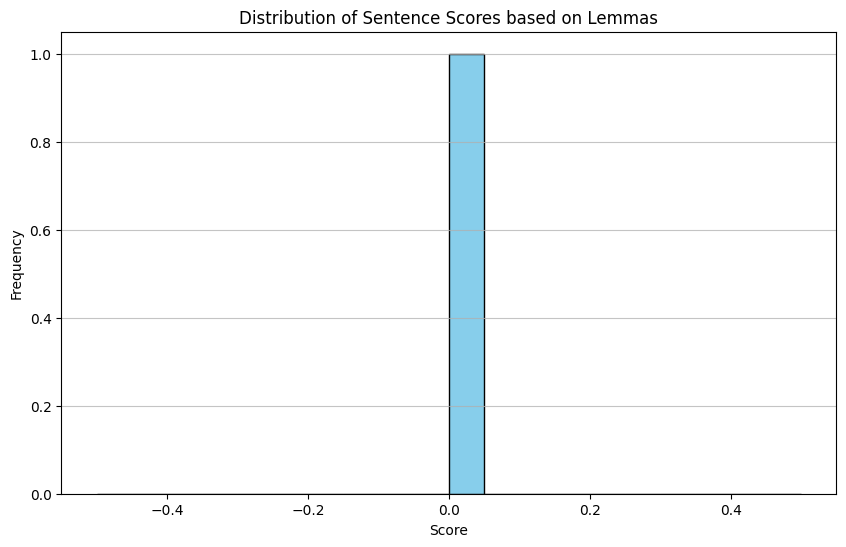

In [46]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Extract sentences from the article text
sentences = nltk.sent_tokenize(article_text)

# Calculate scores for each sentence using lemmas
lemma_scores = [score_sentence_by_lemma(sentence, [lemma.lower() for lemma, _ in most_common_lemmas]) for sentence in sentences if sentence.strip()]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Question 8:
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it)
<br><br>
Question 8 Response

To concentrate only on nouns, we would adjust the code from questions 3 and 4 to check if a token's part of speech is a noun before adding it to our lists. Tokens and lemmas that are not nouns would be omitted.

In spaCy, you can determine the part of speech for a token with token.pos_. The code alteration would look something like this:

In [45]:
# Assuming 'doc' is our processed spaCy document
nouns = [token for token in doc if token.pos_ == 'NOUN']
noun_lemmas = [token.lemma_ for token in nouns]  # We use the filtered noun tokens


This code iterates over each token in our spaCy document and checks if the part of speech is 'NOUN'. If it is, the token (or its lemma) is added to our list. This way, we only consider nouns as our interesting words.